In [69]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

np.random.seed(0)

In [70]:
# Import data set and view raw data
full_data = pd.read_csv("./cosmetics.csv")
full_data.describe()

,Price,Rank,Combination,Dry,Normal,Oily,Sensitive
count,1472.000000,1472.000000,1472.00000,1472.000000,1472.000000,1472.000000,1472.000000
mean,55.584239,4.153261,0.65625,0.614130,0.652174,0.607337,0.513587
std,45.014429,0.633918,0.47512,0.486965,0.476442,0.488509,0.499985
min,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,42.500000,4.300000,1.00000,1.000000,1.000000,1.000000,1.000000
75%,68.000000,4.500000,1.00000,1.000000,1.000000,1.000000,1.000000
max,370.000000,5.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [71]:
# Pull datasets for each type of skincare product (label)
moisturizer_data = full_data[full_data['Label'].isin(['Moisturizer'])]

cleanser_data = full_data[full_data['Label'].isin(['Cleanser'])]

treatment_data = full_data[full_data['Label'].isin(['Treatment'])]

faceMask_data = full_data[full_data['Label'].isin(['Face Mask'])]

eyeCream_data = full_data[full_data['Label'].isin(['Eye cream'])]

sunProtect_data = full_data[full_data['Label'].isin(['Sun protect'])]

sunProtect_data.head(5)

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
1302,Sun protect,LAURA MERCIER,Tinted Moisturizer Broad Spectrum SPF 20,45,4.4,Visit the Laura Mercier boutique,0,0,0,0,0
1303,Sun protect,LAURA MERCIER,Tinted Moisturizer Broad Spectrum SPF 20 - Oil...,45,4.3,Visit the Laura Mercier boutique,0,0,0,0,0
1304,Sun protect,SHISEIDO,Urban Environment Oil-Free UV Protector Broad ...,34,4.5,"Water, Dimethicone, Isododecane, Sd Alcohol 40...",1,0,1,1,0
1305,Sun protect,NARS,Pure Radiant Tinted Moisturizer Broad Spectrum...,45,4.4,Visit the NARS boutique,0,0,0,0,0
1306,Sun protect,SUPERGOOP!,Unseen Sunscreen Broad Spectrum SPF 40,32,4.5,"Isododecane, Dimethicone Crosspolymer, Dimethi...",1,1,1,1,0


## FULL DATASET

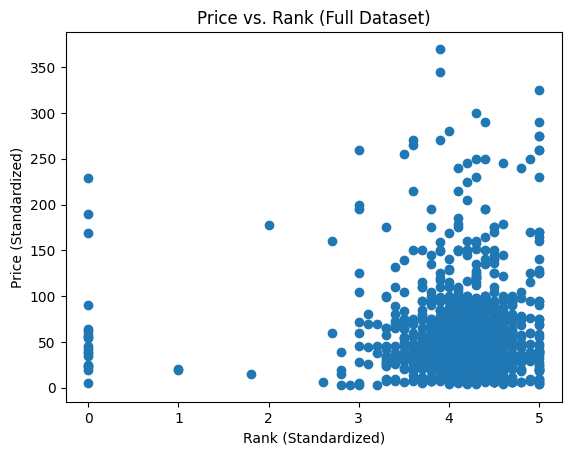

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Linear Regression on Full Training Data
x = full_data['Rank']
y = full_data['Price']

plt.scatter(x, y)
plt.xlabel('Rank (Standardized)')
plt.ylabel('Price (Standardized)')
plt.title('Price vs. Rank (Full Dataset)')
plt.show()

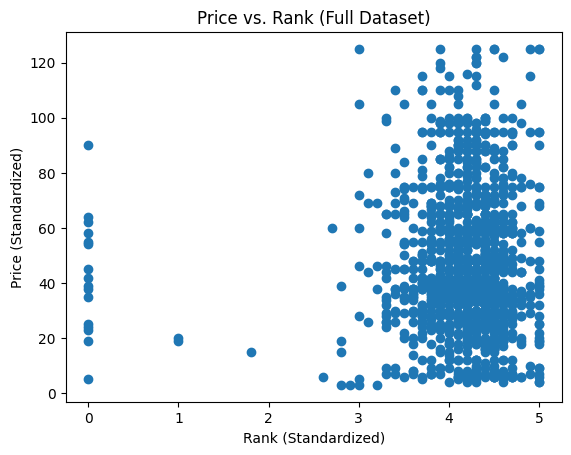

In [73]:
# Importing
import sklearn
import pandas as pd

# Remove outliers
Q1 = np.percentile(full_data['Price'], 25, method='midpoint')
Q3 = np.percentile(full_data['Price'], 75, method='midpoint')
IQR = Q3 - Q1

# Upper bound
upper_bound = Q3 + 1.5 * IQR
 
# Lower bound
lower_bound = Q1 - 1.5 * IQR

# Identify outlier rows
outlier_indices = (full_data['Price'] < lower_bound) | (full_data['Price'] > upper_bound)

# Remove outliers
cleaned_train_data = full_data[~outlier_indices]

# Linear Regression on Full Training Data
x = cleaned_train_data['Rank']
y = cleaned_train_data['Price']

plt.scatter(x, y)
plt.xlabel('Rank (Standardized)')
plt.ylabel('Price (Standardized)')
plt.title('Price vs. Rank (Full Dataset)')
plt.show()

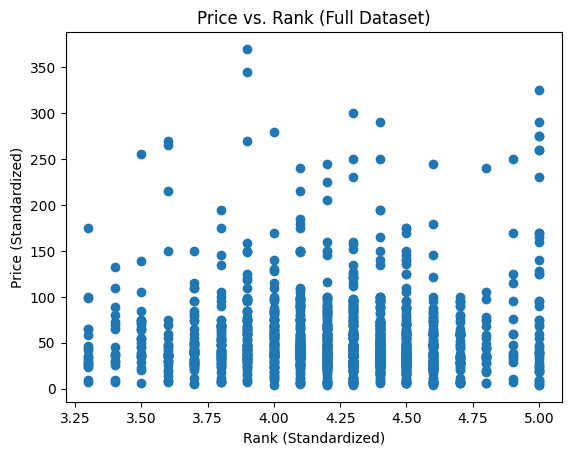

In [74]:
import sklearn
import pandas as pd

# Remove outliers
Q1 = np.percentile(full_data['Rank'], 25, method='midpoint')
Q3 = np.percentile(full_data['Rank'], 75, method='midpoint')
IQR = Q3 - Q1

# Upper bound
upper_bound = Q3 + 1.5 * IQR
 
# Lower bound
lower_bound = Q1 - 1.5 * IQR

# Identify outlier rows
outlier_indices = (full_data['Rank'] < lower_bound) | (full_data['Rank'] > upper_bound)

# Remove outliers
cleaned_data = full_data[~outlier_indices]

x = cleaned_data['Rank']
y = cleaned_data['Price']

plt.scatter(x, y)
plt.xlabel('Rank (Standardized)')
plt.ylabel('Price (Standardized)')
plt.title('Price vs. Rank (Full Dataset)')
plt.show()

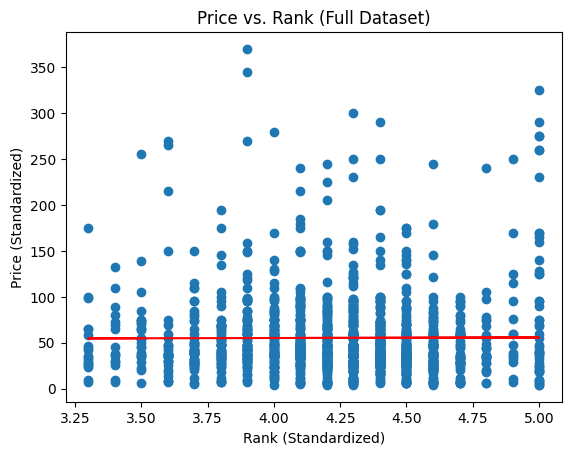

In [75]:
# Fit linear regression model
model = LinearRegression()
model.fit(x.values.reshape(-1, 1), y)

# Calculate y_hat
y_hat = model.predict(x.values.reshape(-1, 1))

# Draw linear regression line
plt.scatter(x, y)
plt.xlabel('Rank (Standardized)')
plt.ylabel('Price (Standardized)')
plt.title('Price vs. Rank (Full Dataset)')
plt.plot(x, y_hat, color = 'red')
plt.show()

In [76]:
slope = model.coef_[0]
print(slope)

0.591227981666648


In [79]:
import statsmodels.api as sm

# Run a linear regression
X_with_intercept = sm.add_constant(x)
model = sm.OLS(y, X_with_intercept).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.03312
Date:                Tue, 19 Mar 2024   Prob (F-statistic):              0.856
Time:                        19:28:34   Log-Likelihood:                -7402.6
No. Observations:                1422   AIC:                         1.481e+04
Df Residuals:                    1420   BIC:                         1.482e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.7281     13.819      3.816      0.0

For every increase in 1 unit of ranking, the price increases by $0.59.

## MOISTURIZER DATA SET

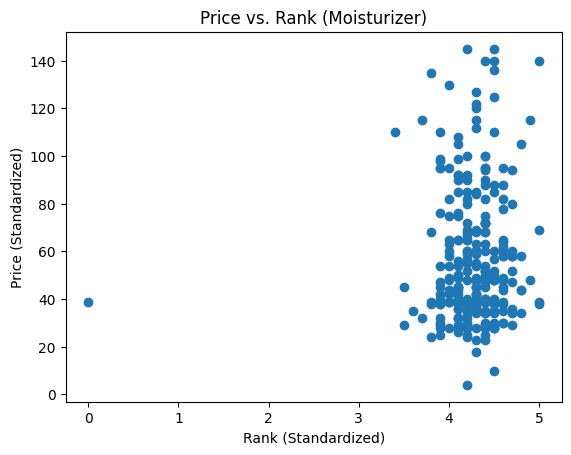

In [80]:
# Remove outliers
Q1 = np.percentile(moisturizer_data['Price'], 25, method='midpoint')
Q3 = np.percentile(moisturizer_data['Price'], 75, method='midpoint')
IQR = Q3 - Q1

# Upper bound
upper_bound = Q3 + 1.5 * IQR
 
# Lower bound
lower_bound = Q1 - 1.5 * IQR

# Identify outlier rows
outlier_indices = (moisturizer_data['Price'] < lower_bound) | (moisturizer_data['Price'] > upper_bound)

# Remove outliers
cleaned_moisturizer_data = moisturizer_data[~outlier_indices]

# Linear Regression on Moisturizer Training Data
x = cleaned_moisturizer_data['Rank']
y = cleaned_moisturizer_data['Price']

plt.scatter(x, y)
plt.xlabel('Rank (Standardized)')
plt.ylabel('Price (Standardized)')
plt.title('Price vs. Rank (Moisturizer)')
plt.show()

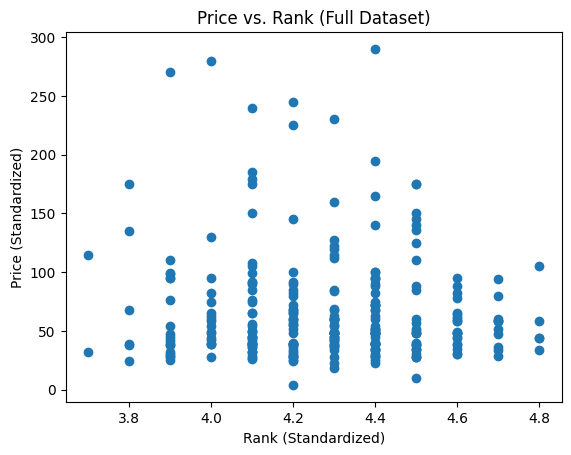

In [81]:
import sklearn
import pandas as pd

# Remove outliers
Q1 = np.percentile(moisturizer_data['Rank'], 25, method='midpoint')
Q3 = np.percentile(moisturizer_data['Rank'], 75, method='midpoint')
IQR = Q3 - Q1

# Upper bound
upper_bound = Q3 + 1.5 * IQR
 
# Lower bound
lower_bound = Q1 - 1.5 * IQR

# Identify outlier rows
outlier_indices = (moisturizer_data['Rank'] < lower_bound) | (moisturizer_data['Rank'] > upper_bound)

# Remove outliers
cleaned_moisturizer_data = moisturizer_data[~outlier_indices]

x = cleaned_moisturizer_data['Rank']
y = cleaned_moisturizer_data['Price']

plt.scatter(x, y)
plt.xlabel('Rank (Standardized)')
plt.ylabel('Price (Standardized)')
plt.title('Price vs. Rank (Full Dataset)')
plt.show()

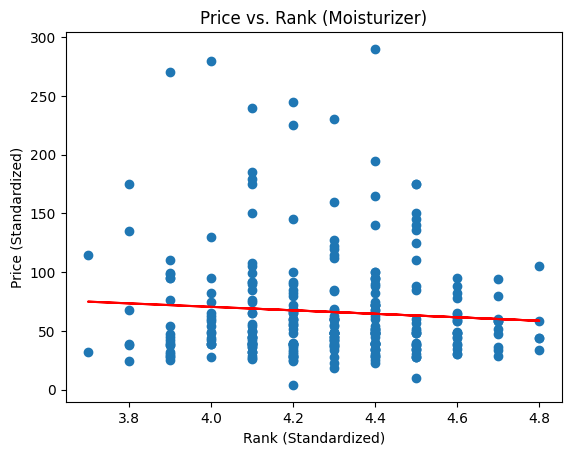

In [82]:
# Fit linear regression model
model = LinearRegression()
model.fit(x.values.reshape(-1, 1), y)

# Calculate y_hat
y_hat = model.predict(x.values.reshape(-1, 1))

# Draw linear regression line
plt.scatter(x, y)
plt.xlabel('Rank (Standardized)')
plt.ylabel('Price (Standardized)')
plt.title('Price vs. Rank (Moisturizer)')
plt.plot(x, y_hat, color = 'red')
plt.show()

In [83]:
slope = model.coef_[0]
print(slope)

-14.776013163733172


In [84]:
import statsmodels.api as sm

# Run a linear regression
X_with_intercept = sm.add_constant(x)
model = sm.OLS(y, X_with_intercept).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.591
Date:                Tue, 19 Mar 2024   Prob (F-statistic):              0.208
Time:                        19:38:32   Log-Likelihood:                -1478.1
No. Observations:                 282   AIC:                             2960.
Df Residuals:                     280   BIC:                             2967.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        129.5481     50.224      2.579      0.0

For every increase in 1 unit of ranking, the price drops by $14.78. 

## CLEANSER DATA SET

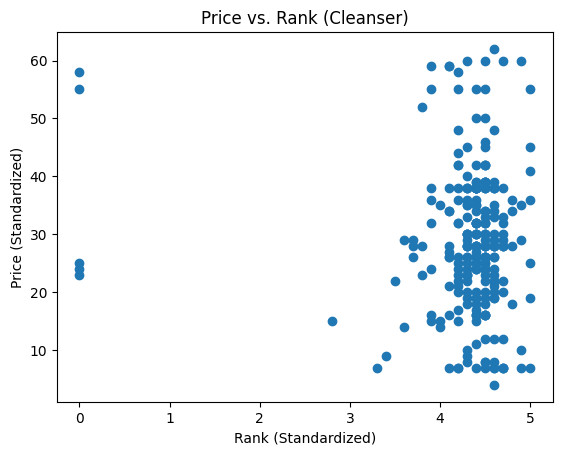

In [85]:
# Remove outliers
Q1 = np.percentile(cleanser_data['Price'], 25, method='midpoint')
Q3 = np.percentile(cleanser_data['Price'], 75, method='midpoint')
IQR = Q3 - Q1

# Upper bound
upper_bound = Q3 + 1.5 * IQR
 
# Lower bound
lower_bound = Q1 - 1.5 * IQR

# Identify outlier rows
outlier_indices = (cleanser_data['Price'] < lower_bound) | (cleanser_data['Price'] > upper_bound)

# Remove outliers
cleaned_cleanser_data = cleanser_data[~outlier_indices]

# Linear Regression on Cleanser Training Data
x = cleaned_cleanser_data['Rank']
y = cleaned_cleanser_data['Price']

plt.scatter(x, y)
plt.xlabel('Rank (Standardized)')
plt.ylabel('Price (Standardized)')
plt.title('Price vs. Rank (Cleanser)')
plt.show()

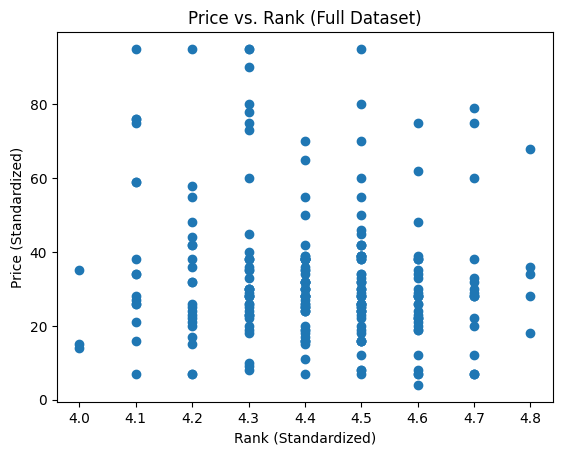

In [86]:
import sklearn
import pandas as pd

# Remove outliers
Q1 = np.percentile(cleanser_data['Rank'], 25, method='midpoint')
Q3 = np.percentile(cleanser_data['Rank'], 75, method='midpoint')
IQR = Q3 - Q1

# Upper bound
upper_bound = Q3 + 1.5 * IQR
 
# Lower bound
lower_bound = Q1 - 1.5 * IQR

# Identify outlier rows
outlier_indices = (cleanser_data['Rank'] < lower_bound) | (cleanser_data['Rank'] > upper_bound)

# Remove outliers
cleaned_cleanser_data = cleanser_data[~outlier_indices]

x = cleaned_cleanser_data['Rank']
y = cleaned_cleanser_data['Price']

plt.scatter(x, y)
plt.xlabel('Rank (Standardized)')
plt.ylabel('Price (Standardized)')
plt.title('Price vs. Rank (Full Dataset)')
plt.show()

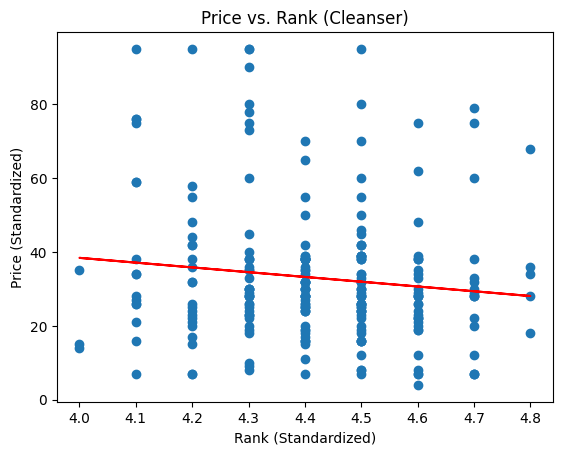

In [87]:
# Fit linear regression model
model = LinearRegression()
model.fit(x.values.reshape(-1, 1), y)

# Calculate y_hat
y_hat = model.predict(x.values.reshape(-1, 1))

# Draw linear regression line
plt.scatter(x, y)
plt.xlabel('Rank (Standardized)')
plt.ylabel('Price (Standardized)')
plt.title('Price vs. Rank (Cleanser)')
plt.plot(x, y_hat, color = 'red')
plt.show()

In [88]:
slope = model.coef_[0]
print(slope)

-12.924260834345901


In [89]:
import statsmodels.api as sm

# Run a linear regression
X_with_intercept = sm.add_constant(x)
model = sm.OLS(y, X_with_intercept).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.615
Date:                Tue, 19 Mar 2024   Prob (F-statistic):             0.0585
Time:                        19:39:19   Log-Likelihood:                -1055.2
No. Observations:                 244   AIC:                             2114.
Df Residuals:                     242   BIC:                             2121.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.1128     30.068      2.997      0.0

For every increase in 1 unit of ranking, the price drops by $12.92. 

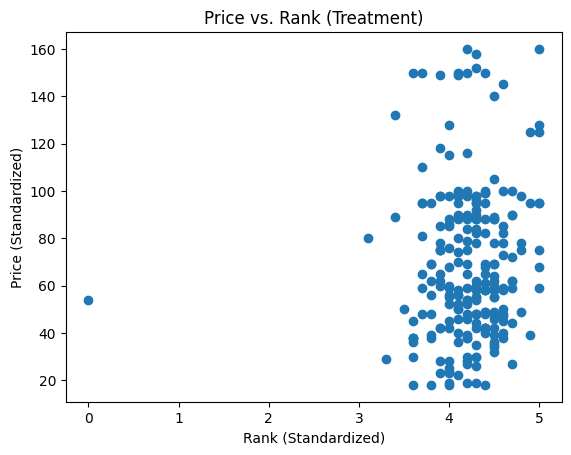

In [90]:
# Remove outliers
Q1 = np.percentile(treatment_data['Price'], 25, method='midpoint')
Q3 = np.percentile(treatment_data['Price'], 75, method='midpoint')
IQR = Q3 - Q1

# Upper bound
upper_bound = Q3 + 1.5 * IQR
 
# Lower bound
lower_bound = Q1 - 1.5 * IQR

# Identify outlier rows
outlier_indices = (treatment_data['Price'] < lower_bound) | (treatment_data['Price'] > upper_bound)

# Remove outliers
cleaned_treatment_data = treatment_data[~outlier_indices]

# Linear Regression on Treatment Training Data
x = cleaned_treatment_data['Rank']
y = cleaned_treatment_data['Price']

plt.scatter(x, y)
plt.xlabel('Rank (Standardized)')
plt.ylabel('Price (Standardized)')
plt.title('Price vs. Rank (Treatment)')
plt.show()

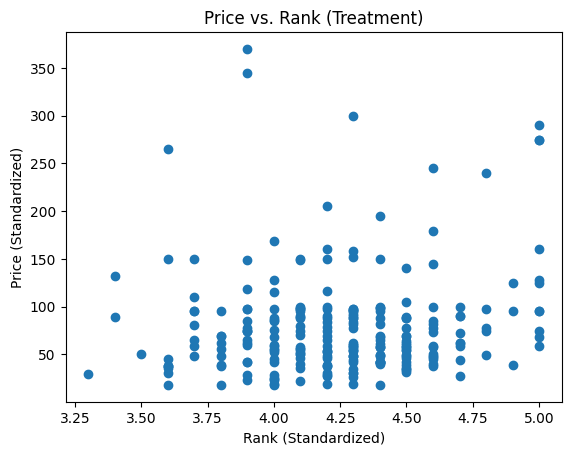

In [91]:
# Remove outliers
Q1 = np.percentile(treatment_data['Rank'], 25, method='midpoint')
Q3 = np.percentile(treatment_data['Rank'], 75, method='midpoint')
IQR = Q3 - Q1

# Upper bound
upper_bound = Q3 + 1.5 * IQR
 
# Lower bound
lower_bound = Q1 - 1.5 * IQR

# Identify outlier rows
outlier_indices = (treatment_data['Rank'] < lower_bound) | (treatment_data['Rank'] > upper_bound)

# Remove outliers
cleaned_treatment_data = treatment_data[~outlier_indices]

# Linear Regression on Treatment Training Data
x = cleaned_treatment_data['Rank']
y = cleaned_treatment_data['Price']

plt.scatter(x, y)
plt.xlabel('Rank (Standardized)')
plt.ylabel('Price (Standardized)')
plt.title('Price vs. Rank (Treatment)')
plt.show()

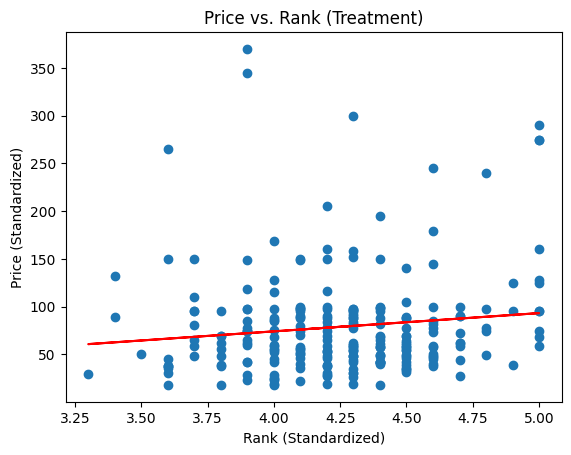

In [92]:
# Fit linear regression model
model = LinearRegression()
model.fit(x.values.reshape(-1, 1), y)

# Calculate y_hat
y_hat = model.predict(x.values.reshape(-1, 1))

# Draw linear regression line
plt.scatter(x, y)
plt.xlabel('Rank (Standardized)')
plt.ylabel('Price (Standardized)')
plt.title('Price vs. Rank (Treatment)')
plt.plot(x, y_hat, color = 'red')
plt.show()

In [93]:
slope = model.coef_[0]
print(slope)

19.122807017543884


In [94]:
import statsmodels.api as sm

# Run a linear regression
X_with_intercept = sm.add_constant(x)
model = sm.OLS(y, X_with_intercept).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.736
Date:                Tue, 19 Mar 2024   Prob (F-statistic):             0.0544
Time:                        19:39:43   Log-Likelihood:                -1324.8
No. Observations:                 245   AIC:                             2654.
Df Residuals:                     243   BIC:                             2661.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3789     42.180     -0.056      0.9

For every increase in 1 unit of ranking, the price drops by $19.12.

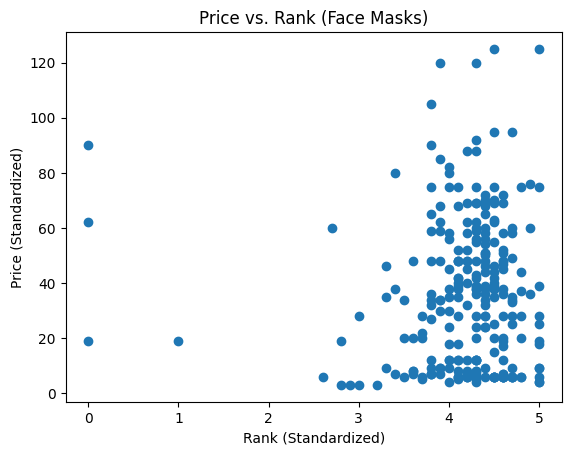

In [95]:
# Remove outliers
Q1 = np.percentile(faceMask_data['Price'], 25, method='midpoint')
Q3 = np.percentile(faceMask_data['Price'], 75, method='midpoint')
IQR = Q3 - Q1

# Upper bound
upper_bound = Q3 + 1.5 * IQR
 
# Lower bound
lower_bound = Q1 - 1.5 * IQR

# Identify outlier rows
outlier_indices = (faceMask_data['Price'] < lower_bound) | (faceMask_data['Price'] > upper_bound)

# Remove outliers
cleaned_faceMask_data = faceMask_data[~outlier_indices]

# Linear Regression on Face Mask Training Data
x = cleaned_faceMask_data['Rank']
y = cleaned_faceMask_data['Price']

plt.scatter(x, y)
plt.xlabel('Rank (Standardized)')
plt.ylabel('Price (Standardized)')
plt.title('Price vs. Rank (Face Masks)')
plt.show()

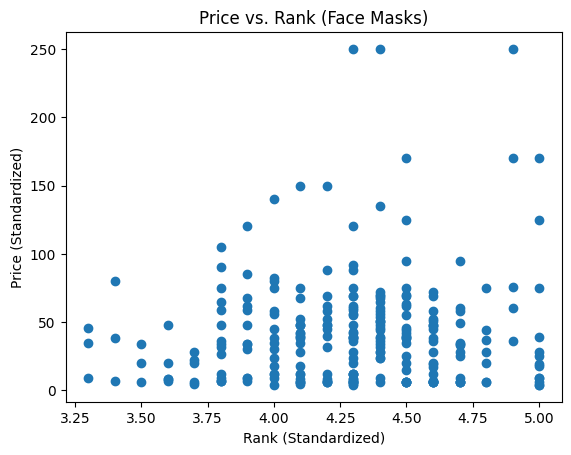

In [96]:
# Remove outliers
Q1 = np.percentile(faceMask_data['Rank'], 25, method='midpoint')
Q3 = np.percentile(faceMask_data['Rank'], 75, method='midpoint')
IQR = Q3 - Q1

# Upper bound
upper_bound = Q3 + 1.5 * IQR
 
# Lower bound
lower_bound = Q1 - 1.5 * IQR

# Identify outlier rows
outlier_indices = (faceMask_data['Rank'] < lower_bound) | (faceMask_data['Rank'] > upper_bound)

# Remove outliers
cleaned_faceMask_data = faceMask_data[~outlier_indices]

# Linear Regression on Face Mask Training Data
x = cleaned_faceMask_data['Rank']
y = cleaned_faceMask_data['Price']

plt.scatter(x, y)
plt.xlabel('Rank (Standardized)')
plt.ylabel('Price (Standardized)')
plt.title('Price vs. Rank (Face Masks)')
plt.show()

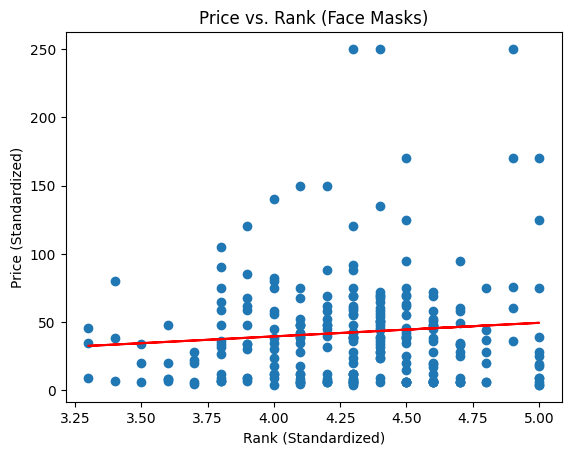

In [97]:
# Fit linear regression model
model = LinearRegression()
model.fit(x.values.reshape(-1, 1), y)

# Calculate y_hat
y_hat = model.predict(x.values.reshape(-1, 1))

# Draw linear regression line
plt.scatter(x, y)
plt.xlabel('Rank (Standardized)')
plt.ylabel('Price (Standardized)')
plt.title('Price vs. Rank (Face Masks)')
plt.plot(x, y_hat, color = 'red')
plt.show()

In [98]:
slope = model.coef_[0]
print(slope)

9.951004172468023


In [99]:
import statsmodels.api as sm

# Run a linear regression
X_with_intercept = sm.add_constant(x)
model = sm.OLS(y, X_with_intercept).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.200
Date:                Tue, 19 Mar 2024   Prob (F-statistic):              0.139
Time:                        19:40:04   Log-Likelihood:                -1285.1
No. Observations:                 252   AIC:                             2574.
Df Residuals:                     250   BIC:                             2581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2778     28.906     -0.010      0.9

For every increase in 1 unit of ranking, the price increases by $9.95.

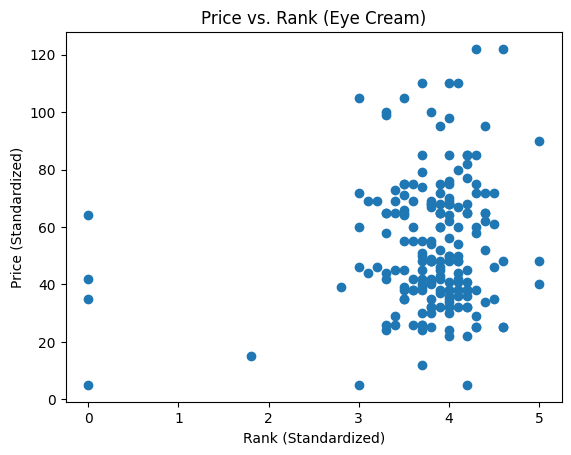

In [100]:
# Remove outliers
Q1 = np.percentile(eyeCream_data['Price'], 25, method='midpoint')
Q3 = np.percentile(eyeCream_data['Price'], 75, method='midpoint')
IQR = Q3 - Q1

# Upper bound
upper_bound = Q3 + 1.5 * IQR
 
# Lower bound
lower_bound = Q1 - 1.5 * IQR

# Identify outlier rows
outlier_indices = (eyeCream_data['Price'] < lower_bound) | (eyeCream_data['Price'] > upper_bound)

# Remove outliers
cleaned_eyeCream_data = eyeCream_data[~outlier_indices]

# Linear Regression on Eye Cream Training Data
x = cleaned_eyeCream_data['Rank']
y = cleaned_eyeCream_data['Price']

plt.scatter(x, y)
plt.xlabel('Rank (Standardized)')
plt.ylabel('Price (Standardized)')
plt.title('Price vs. Rank (Eye Cream)')
plt.show()

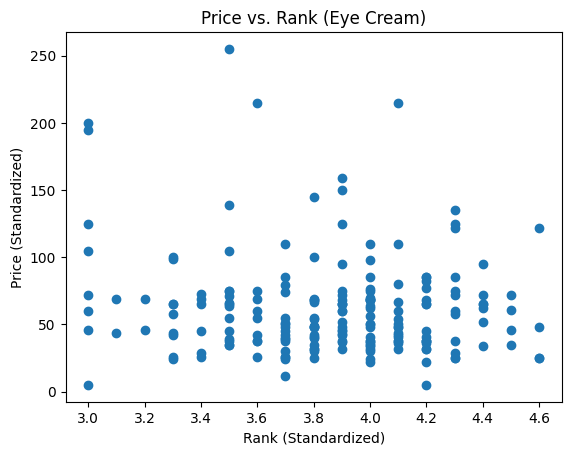

In [101]:
# Remove outliers
Q1 = np.percentile(eyeCream_data['Rank'], 25, method='midpoint')
Q3 = np.percentile(eyeCream_data['Rank'], 75, method='midpoint')
IQR = Q3 - Q1

# Upper bound
upper_bound = Q3 + 1.5 * IQR
 
# Lower bound
lower_bound = Q1 - 1.5 * IQR

# Identify outlier rows
outlier_indices = (eyeCream_data['Rank'] < lower_bound) | (eyeCream_data['Rank'] > upper_bound)

# Remove outliers
cleaned_eyeCream_data = eyeCream_data[~outlier_indices]

# Linear Regression on Eye Cream Training Data
x = cleaned_eyeCream_data['Rank']
y = cleaned_eyeCream_data['Price']

plt.scatter(x, y)
plt.xlabel('Rank (Standardized)')
plt.ylabel('Price (Standardized)')
plt.title('Price vs. Rank (Eye Cream)')
plt.show()

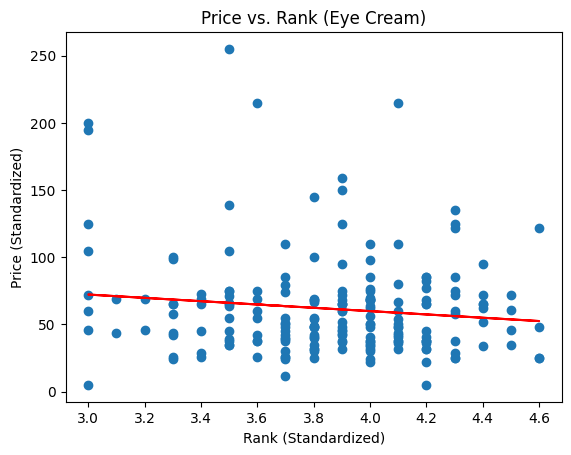

In [102]:
# Fit linear regression model
model = LinearRegression()
model.fit(x.values.reshape(-1, 1), y)

# Calculate y_hat
y_hat = model.predict(x.values.reshape(-1, 1))

# Draw linear regression line
plt.scatter(x, y)
plt.xlabel('Rank (Standardized)')
plt.ylabel('Price (Standardized)')
plt.title('Price vs. Rank (Eye Cream)')
plt.plot(x, y_hat, color = 'red')
plt.show()

In [103]:
slope = model.coef_[0]
print(slope)

-12.328788031999629


In [104]:
import statsmodels.api as sm

# Run a linear regression
X_with_intercept = sm.add_constant(x)
model = sm.OLS(y, X_with_intercept).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.962
Date:                Tue, 19 Mar 2024   Prob (F-statistic):             0.0868
Time:                        19:40:16   Log-Likelihood:                -985.07
No. Observations:                 196   AIC:                             1974.
Df Residuals:                     194   BIC:                             1981.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        109.2313     27.752      3.936      0.0

For every increase in 1 unit of ranking, the price drops by $12.33.

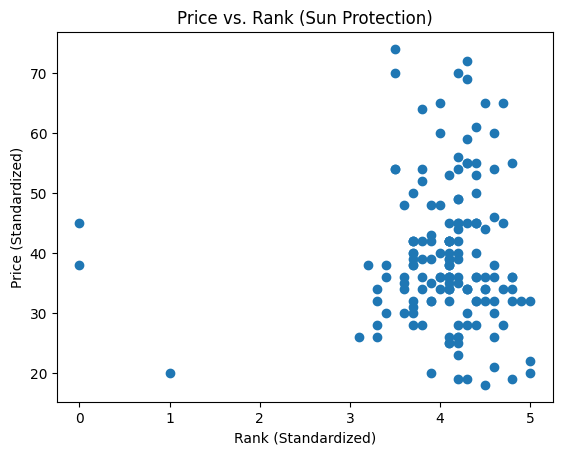

In [105]:
# Remove outliers
Q1 = np.percentile(sunProtect_data['Price'], 25, method='midpoint')
Q3 = np.percentile(sunProtect_data['Price'], 75, method='midpoint')
IQR = Q3 - Q1

# Upper bound
upper_bound = Q3 + 1.5 * IQR
 
# Lower bound
lower_bound = Q1 - 1.5 * IQR

# Identify outlier rows
outlier_indices = (sunProtect_data['Price'] < lower_bound) | (sunProtect_data['Price'] > upper_bound)

# Remove outliers
cleaned_sunProtect_data = sunProtect_data[~outlier_indices]

# Linear Regression on Full Training Data
x = cleaned_sunProtect_data['Rank']
y = cleaned_sunProtect_data['Price']

plt.scatter(x, y)
plt.xlabel('Rank (Standardized)')
plt.ylabel('Price (Standardized)')
plt.title('Price vs. Rank (Sun Protection)')
plt.show()

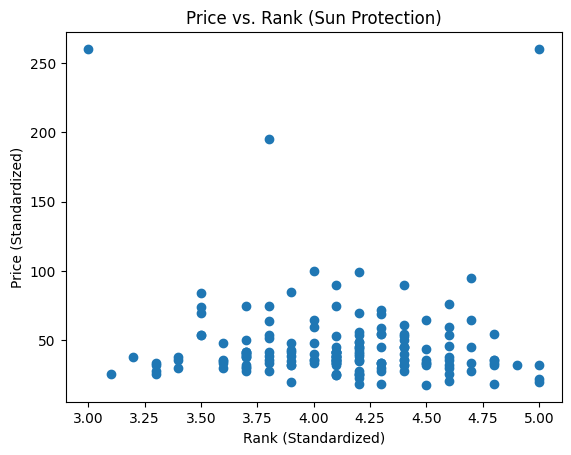

In [106]:
# Remove outliers
Q1 = np.percentile(sunProtect_data['Rank'], 25, method='midpoint')
Q3 = np.percentile(sunProtect_data['Rank'], 75, method='midpoint')
IQR = Q3 - Q1

# Upper bound
upper_bound = Q3 + 1.5 * IQR
 
# Lower bound
lower_bound = Q1 - 1.5 * IQR

# Identify outlier rows
outlier_indices = (sunProtect_data['Rank'] < lower_bound) | (sunProtect_data['Rank'] > upper_bound)

# Remove outliers
cleaned_sunProtect_data = sunProtect_data[~outlier_indices]

# Linear Regression on Full Training Data
x = cleaned_sunProtect_data['Rank']
y = cleaned_sunProtect_data['Price']

plt.scatter(x, y)
plt.xlabel('Rank (Standardized)')
plt.ylabel('Price (Standardized)')
plt.title('Price vs. Rank (Sun Protection)')
plt.show()

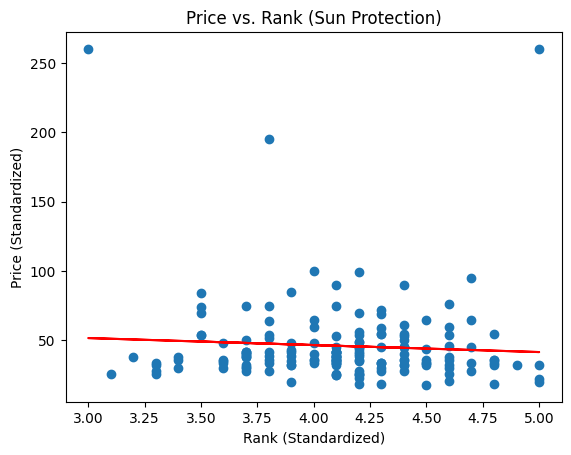

In [107]:
# Fit linear regression model
model = LinearRegression()
model.fit(x.values.reshape(-1, 1), y)

# Calculate y_hat
y_hat = model.predict(x.values.reshape(-1, 1))

# Draw linear regression line
plt.scatter(x, y)
plt.xlabel('Rank (Standardized)')
plt.ylabel('Price (Standardized)')
plt.title('Price vs. Rank (Sun Protection)')
plt.plot(x, y_hat, color = 'red')
plt.show()

In [108]:
rank_est_coef = model.coef_[0]
print("coefficient of rank is: ", rank_est_coef)

coefficient of rank is:  -5.047139946851817


In [109]:
import statsmodels.api as sm

# Run a linear regression
X_with_intercept = sm.add_constant(x)
model = sm.OLS(y, X_with_intercept).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7352
Date:                Tue, 19 Mar 2024   Prob (F-statistic):              0.392
Time:                        19:40:34   Log-Likelihood:                -809.64
No. Observations:                 167   AIC:                             1623.
Df Residuals:                     165   BIC:                             1630.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.8977     24.358      2.746      0.0

For every increase in 1 unit of ranking, the price drops by $5.05.